<a href="https://colab.research.google.com/github/jiayizhang19/Deep_Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS401 Assignment 2 - Part 2 Implementing, evaluating and improving a Convolutional Nerual Network for classification using CIFAR-10 dataset**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Task 1: Implementing a Standard CNN
## Task 1a: Load and Prepare the CIFAR-10 Dataset
Here is a brief explanation and preparation on CIFAR-10 dataset:
- CIFAR-10 contains 60,000 32x32x3 color images in 10 classes.
- 50,000 images are used for training dataset and 10,000 are used for testing dataset.
- Images will be normolized to [0,1] from [0,255] for better convergence.

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Check dataset shape
print("Training data shape (x_train):", x_train.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Test data shape (x_test):", x_test.shape)
print("Test labels shape (y_test):", y_test.shape)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape (x_train): (50000, 32, 32, 3)
Training labels shape (y_train): (50000, 1)
Test data shape (x_test): (10000, 32, 32, 3)
Test labels shape (y_test): (10000, 1)


## Task 1b: Design CNN Architecture
- **Convolutional block x 3**
  - **Convolutional layer x 2** --> Extract different features
    - Different number of filters are used in each block, from 32 (first block), to 64 (second block) to 128 (third block).
    - A 3x3 kernel
    - A ReLU activation function
    - Zero-padding is applied to ensure an equal treatment of edge pixels so that the kernel can slide over every pixel uniformly. Also it keeps the size of output is completely the same as the input for
  - **Batch Normalization x 1** --> Stablizes training and accelerates convergence.
  - **Max pooling layer x 1** --> Reduces spatial dimensions while preserving important features.
    - A 2x2 max pooling
  - **Dropout layer x 1** --> Prevents overfitting.
    - A 25% dropout is applied in each convolutional block
    - A 50% dropout is applied in the fianl fully connected layer
- **Fully connected layer x 1**
  - Flatten 3D output into 1D vector
  - Dense layer is designed to combine and weight all features
    - First dense layer with 256 features for complex patterns modelling
    - Second dense layer with 10 features is used to produce a probability distribution over 10 classes
  - A Softmax function for final classification



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

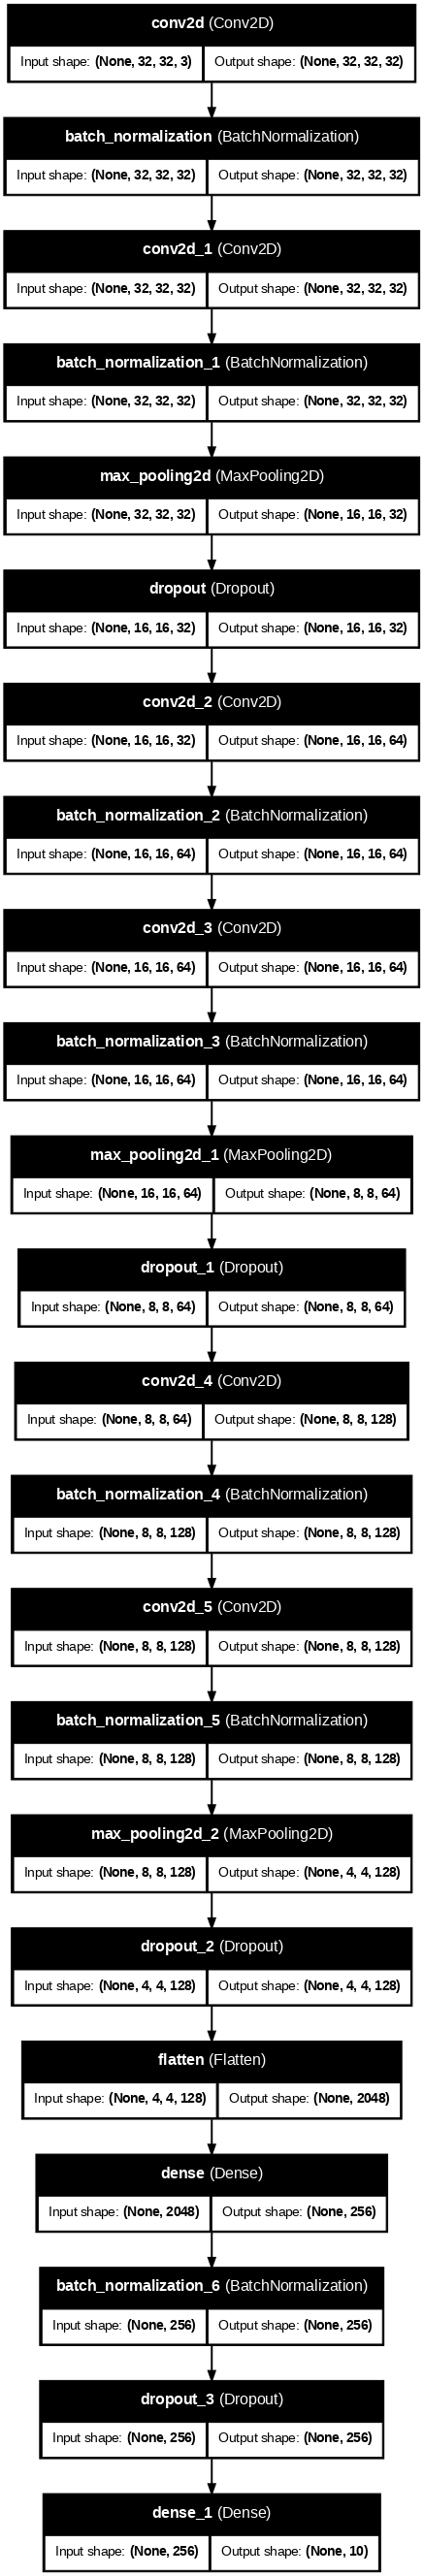

In [ ]:
def create_cnn_model():
    model = models.Sequential([
        # Convolutional block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Convolutional block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Convolutional block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Fully connected layers for classification
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build and plot the model
model = create_cnn_model()
model.summary()
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    # Make the plot a smaller size
    dpi=70,
)


### Task 1c: Training the model
- Optimizer: Adam
- Learning rate: 0.001, standard starting point for Adam optimizer
- Callback: Use early stopping to prevent overfitting
  - Early Stopping: Stop training early if the model stops improving on the monitored metric (val_loss by default).
  - ReduceLROnPlateau: Dynamically reduces the learning rate when the monitored metric stops improving.
- Batch size: 64, start from a medium batch to balance training speed and gradient descent quality
- Epoch: 50
- Validation Split: 20% of training dataset will be used as validation dataset

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train the model[]
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3517 - loss: 2.0648 - val_accuracy: 0.4969 - val_loss: 1.3853 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6002 - loss: 1.1249 - val_accuracy: 0.6931 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6843 - loss: 0.8943 - val_accuracy: 0.7197 - val_loss: 0.8055 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7249 - loss: 0.7877 - val_accuracy: 0.7190 - val_loss: 0.8055 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7526 - loss: 0.7065 - val_accuracy: 0.7518 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7811 - loss: 0.6257 - val_accuracy: 0.7771 - val_loss: 0.6388 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7958 - loss: 0

### Task 1d: Plotting and Interpreting Results
In general, this model reaches around 84.8% validation accuracy which is good for this dataset. However, it still has overfitting, see interpretations in below.
- Traning and Validation Loss
  - Traning loss is descreasing steadily to 0.12 among all epochs while validation loss drops quickly at first then fluctutates around 0.5 after about 10 epochs.
  - Validation loss suggests overfitting is present, and the gap between training loss and validation loss suggests the model memorizes training data more than generalizing.
- Training and Validation Accuracy
  - Training accuracy climbs rapidly to 0.96 while validation accuracy fluctutates around 0.85.
  - The 12% gap between test accuracy and validation accuracy confirms overfitting of this model.
  
The model is strong enough with a 85% accuracy, and correct predictions in confusion matrix is high as shown in value of diagonal cells. And the model performs equally on each class without any severe class imbalance.

In [ ]:
def plot_train_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

  # Plot loss
  ax1.plot(history.history['loss'], label='Training Loss')
  ax1.plot(history.history['val_loss'], label='Validation Loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()
  ax1.grid(True)

  # Plot accuracy
  ax2.plot(history.history['accuracy'], label='Training Accuracy')
  ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.tight_layout()
  plt.show()

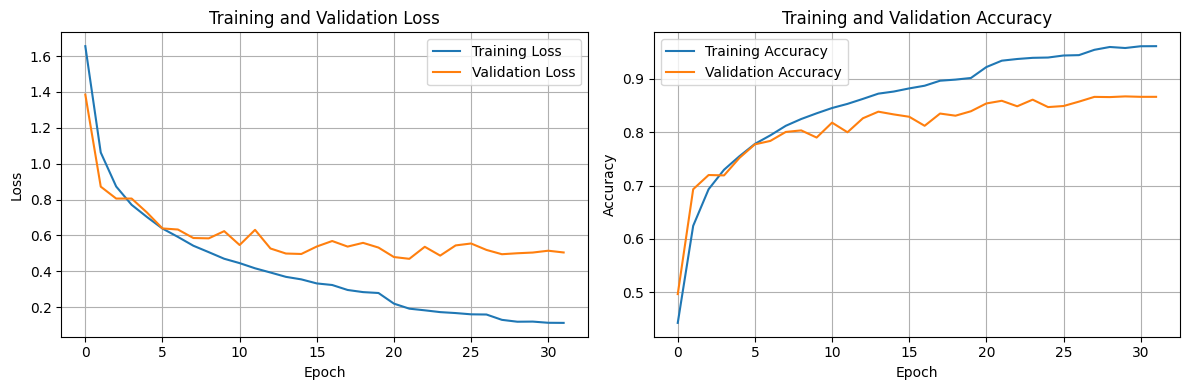

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0480

Train Loss: 0.1252
Train Accuracy: 0.9649
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.5079

Test Loss: 0.5142
Test Accuracy: 0.8488
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


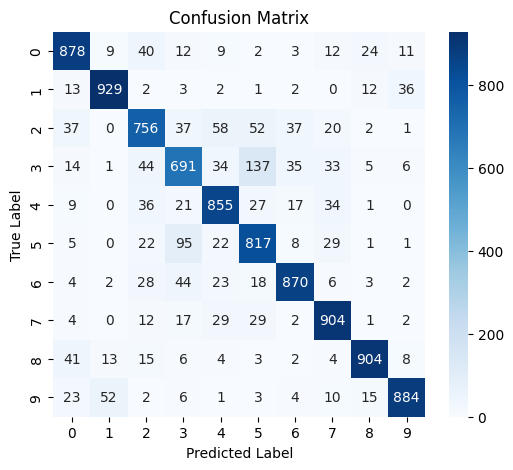

In [ ]:
# Plot loss and accuracy
plot_train_history(history)

# Evaluate on train and test dataset
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Task Two: Experiment with Architecture and Parameters
Task 2a: Doubling Convolutional Layers
- Change made compared to task 1:
  - Double the number of convolutional layers in each convolutional block
- Model Performance Comparasion:
  - Test accuracy improves alightly with doubled layers.
    | Accuracy | New CNN (Double Layers) | Original CNN |
    | ---------| -------------------| ------------------|
    | Train Accuracy | 0.9620 | 0.9649 |
    | Test Accuracy | 0.8540 | 0.8488 |
  - Generalization: Presents overfitting, the gap between train and test accuracy is big.
  - Convergence: Similar to the original CNN, not good.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,204,458 (4.59 MB)

 Trainable params: 1,203,050 (4.59 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.2922 - loss: 2.2565 - val_accuracy: 0.4942 - val_loss: 1.4293 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5222 - loss: 1.3675 - val_accuracy: 0.5646 - val_loss: 1.3310 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6270 - loss: 1.0475 - val_accuracy: 0.6467 - val_loss: 1.0338 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6954 - loss: 0.8673 - val_accuracy: 0.7010 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7310 - loss: 0.7714 - val_accuracy: 0.7126 - val_loss: 0.8275 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7567 - loss: 0.6966 - val_accuracy: 0.7251 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7870 - l

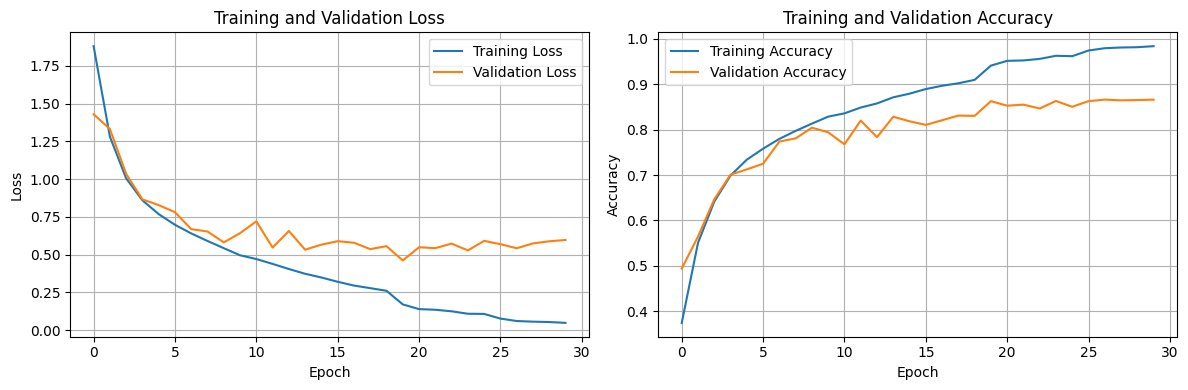

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0588

Train Loss: 0.1322
Train Accuracy: 0.9620
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.4994

Test Loss: 0.4964
Test Accuracy: 0.8540
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


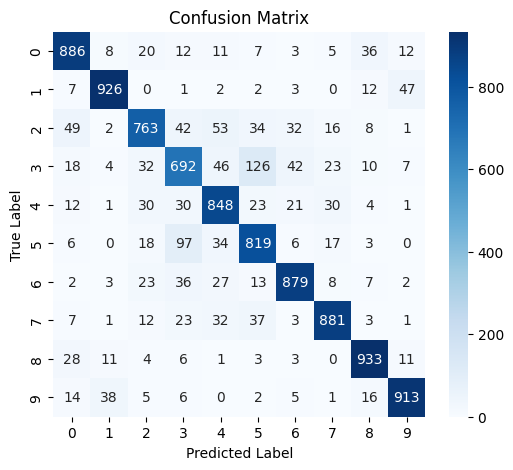

In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_double_layers():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_double_layers = create_cnn_model_double_layers()
model_double_layers.summary()
tf.keras.utils.plot_model(
    model_double_layers,
    show_shapes=True,
    show_layer_names=True,
    # Make the plot a smaller size
    dpi=70,
)

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_double_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_double_layers = model_double_layers.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback
)

# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_double_layers)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_double_layers.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_double_layers.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_double_layers = np.argmax(model_double_layers.predict(x_test), axis=1)
conf_matrix_double_layers = confusion_matrix(y_test, y_pred_double_layers)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_double_layers, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Task 2b: Changing Kernel Size
- Change made compared to task 1:
  - Kernel size is changed from 3x3 to 5x5
- Model Performance Comparasion:
  - Test accuracy is decreased sharply compared to the original architecture.
  | Accuracy | New CNN (Bigger Kernel Size) | Original CNN |
  | ---------| -------------------| ------------------|
  | Train Accuracy | 0.9126 | 0.9649 |
  | Test Accuracy | 0.8153 | 0.8488 |
  - Generalization: Presents overfitting, the gap between train and test accuracy is big.
  - Convergence: Worse than the original.


In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_changing_kernel():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_changing_kernel = create_cnn_model_changing_kernel()
model_changing_kernel.summary()
tf.keras.utils.plot_model(
    model_changing_kernel,
    show_shapes=True,
    show_layer_names=True,
    # Make the plot a smaller size
    dpi=70,
)

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_changing_kernel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_changing_kernel = model_changing_kernel.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 8, 8, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,326,378 (5.06 MB)

 Trainable params: 1,324,970 (5.05 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3456 - loss: 2.0678 - val_accuracy: 0.5177 - val_loss: 1.3731 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6021 - loss: 1.1212 - val_accuracy: 0.5778 - val_loss: 1.2393 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6881 - loss: 0.8906 - val_accuracy: 0.6456 - val_loss: 1.0028 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7444 - loss: 0.7345 - val_accuracy: 0.6807 - val_loss: 0.9637 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7728 - loss: 0.6520 - val_accuracy: 0.7467 - val_loss: 0.7430 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8000 - loss: 0.5699 - val_accuracy: 0.7739 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8273 - l

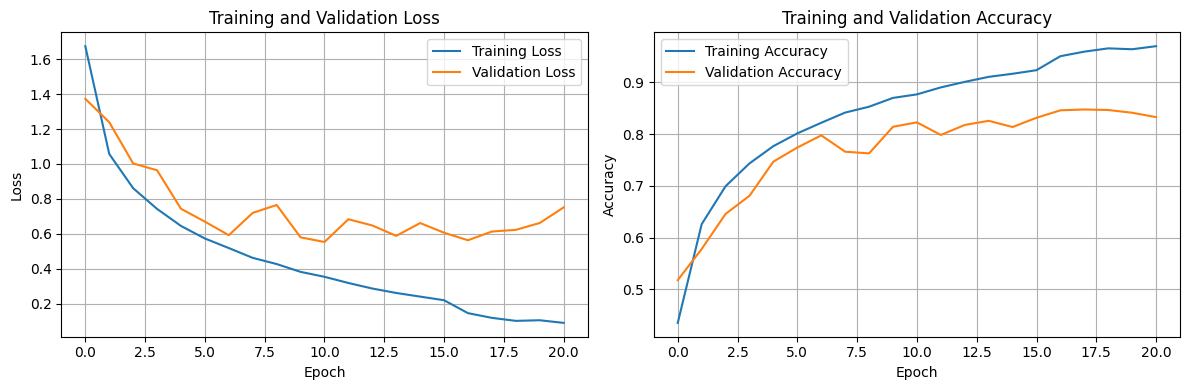

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9338 - loss: 0.1996

Train Loss: 0.2669
Train Accuracy: 0.9126
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.5856

Test Loss: 0.5805
Test Accuracy: 0.8153
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


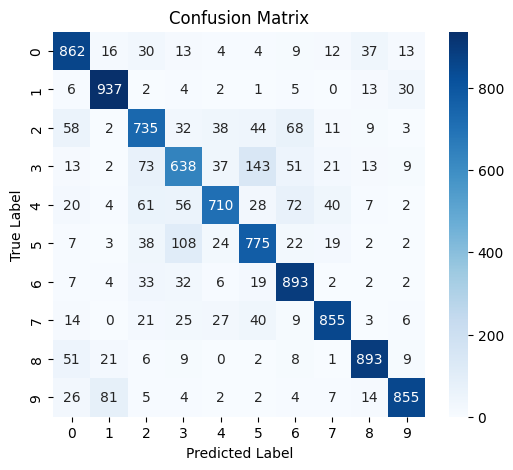

In [ ]:
# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_changing_kernel)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_changing_kernel.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_changing_kernel.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_changing_kernel = np.argmax(model_changing_kernel.predict(x_test), axis=1)
conf_matrix_changing_kernel = confusion_matrix(y_test, y_pred_changing_kernel)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_changing_kernel, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Task 2c: Alternative learning rates
- Change made compared to task 1:
  - Learning rate is changed from 0.001 to 0.01 and 0.0001
- Model Performance Comparasion:
  - Test accuracy is decreased slightly compared to the original architecture.
  | Accuracy | lr=0.01 | lr=0.0001 |lr=0.001 (original)|
  | ---------| -------------------| ------------------|------------------|
  | Train Accuracy | 0.9126 | 0.9126 | 0.9649 |
  | Test Accuracy | 0.8445 | 0.8319 | 0.8488 |
  - Generalization:
    - lr=0.0001: No overfitting, the gap between train and test accuracy is very small, suggesting a very good generalization.
    - lr=0.01: Presents overfitting, the gap between train and test accuracy is big.
  - Convergence:
    - lr=0.0001: Better than the original, very good.
    - lr=0.01: Worse than the original.



Training with learning rate:0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3309 - loss: 2.0215 - val_accuracy: 0.5275 - val_loss: 1.3796 - learning_rate: 0.0100
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5967 - loss: 1.1366 - val_accuracy: 0.6449 - val_loss: 0.9985 - learning_rate: 0.0100
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6806 - loss: 0.9149 - val_accuracy: 0.6384 - val_loss: 1.0161 - learning_rate: 0.0100
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7185 - loss: 0.8021 - val_accuracy: 0.6698 - val_loss: 0.9984 - learning_rate: 0.0100
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7462 - loss: 0.7307 - val_accuracy: 0.7339 - val_loss: 0.7829 - learning_rate: 0.0100
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7670 - loss: 0.6771 - val_accuracy: 0.7566 - val_loss: 0.7125 - learning_rate: 0.0100
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7776 - loss: 

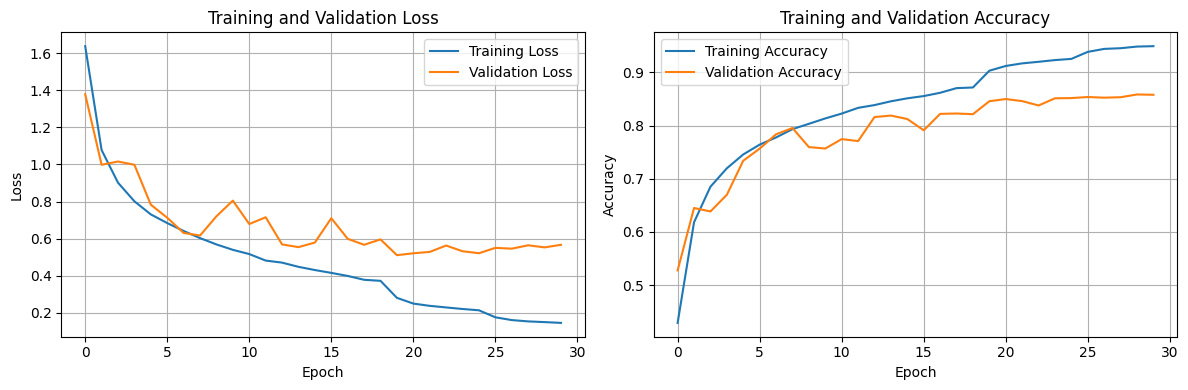

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9638 - loss: 0.1109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.5304
Train Accuracy with LR=0.01: 0.9126
Train Loss with LR=0.01: 0.2669
Test Accuracy with LR=0.01: 0.8445
Test Loss with LR=0.01: 0.5277

Training with learning rate:0.0001
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2298 - loss: 2.7623 - val_accuracy: 0.3256 - val_loss: 1.9153 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3834 - loss: 1.9145 - val_accuracy: 0.4657 - val_loss: 1.5134 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4468 - loss: 1.6569 - val_accuracy: 0.4952 - val_loss: 1.4616 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4970 - loss: 1.4636 - val_accuracy: 0.5404 - val_loss: 1.3029 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/s

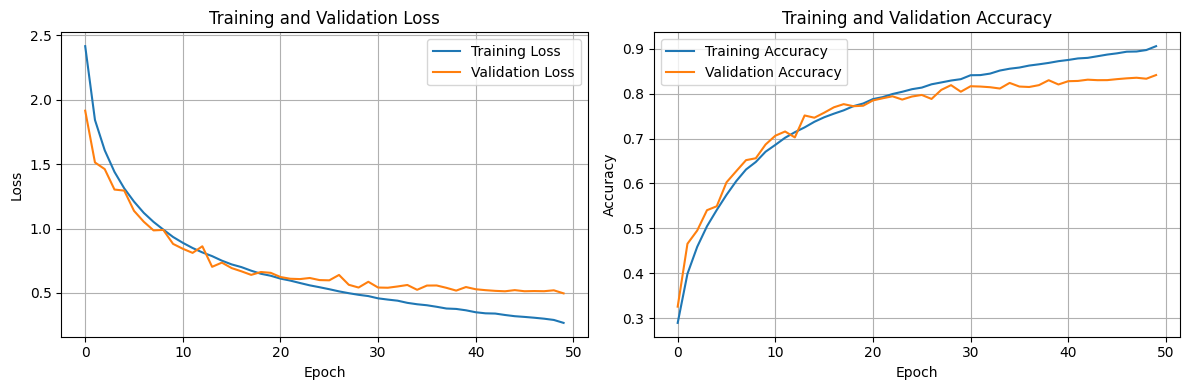

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9795 - loss: 0.0840
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8336 - loss: 0.5286
Train Accuracy with LR=0.0001: 0.9126
Train Loss with LR=0.0001: 0.2669
Test Accuracy with LR=0.0001: 0.8319
Test Loss with LR=0.0001: 0.5297


In [ ]:
learning_rates = [0.01, 0.0001]
results = {}
for lr in learning_rates:
  print(f'\nTraining with learning rate:{lr}')
  model_lr = create_cnn_model()
  model_lr.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_lr = model_lr.fit(
      x_train, y_train,
      batch_size=64,
      epochs=50,
      validation_split=0.2,
      callbacks=callback
   )
  results[lr] = history_lr.history
  plot_train_history(history_lr)
  # Evaluate on test set
  test_loss, test_accuracy = model_lr.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_lr.evaluate(x_test, y_test)
  print(f'Train Accuracy with LR={lr}: {train_accuracy:.4f}')
  print(f'Train Loss with LR={lr}: {train_loss:.4f}')
  print(f'Test Accuracy with LR={lr}: {test_accuracy:.4f}')
  print(f'Test Loss with LR={lr}: {test_loss:.4f}')

Task 2d: Alternative Activation Function
- Change made compared to task 1:
  - Activation function is changed from ReLU to Tanh
- Model Performance Comparasion:
  - Test accuracy is decreased greatly compared to the original one.
  | Accuracy | tanh (new) |relu (original)|
  | ---------| -------------------| ------------------|
  | Train Accuracy | 0.8754 | 0.9649 |
  | Test Accuracy | 0.7970 | 0.8488 |
  - Generalization: No overfitting in this model, the gap between train and test accuracy is very small, suggesting a very good generalization.
  - Convergence: Very good.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.2988 - loss: 2.1320 - val_accuracy: 0.2554 - val_loss: 2.5321 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4661 - loss: 1.4577 - val_accuracy: 0.4633 - val_loss: 1.4874 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5333 - loss: 1.2913 - val_accuracy: 0.5766 - val_loss: 1.2285 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5820 - loss: 1.1786 - val_accuracy: 0.6043 - val_loss: 1.1283 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6095 - loss: 1.1065 - val_accuracy: 0.6272 - val_loss: 1.0517 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6328 - loss: 1.0454 - val_accuracy: 0.6308 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6477 - loss: 1

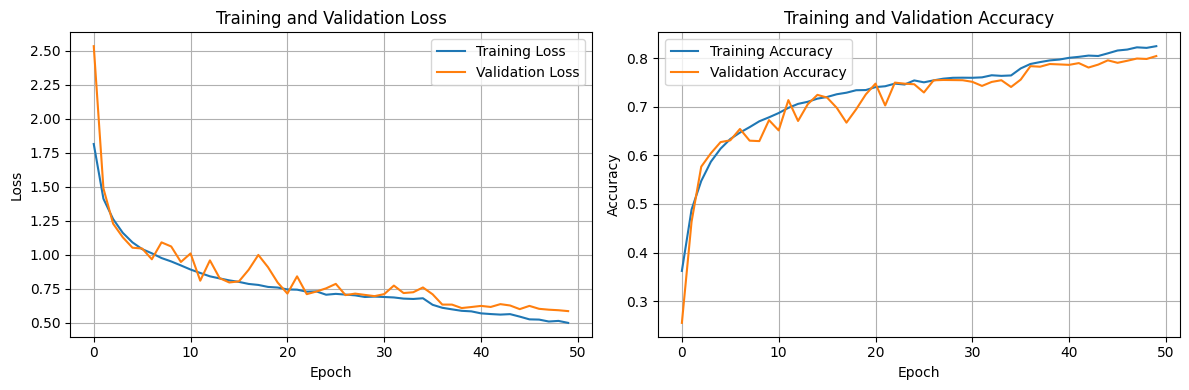

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8923 - loss: 0.3160

Train Loss: 0.3678
Train Accuracy: 0.8754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8005 - loss: 0.6172

Test Loss: 0.6123
Test Accuracy: 0.7970
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


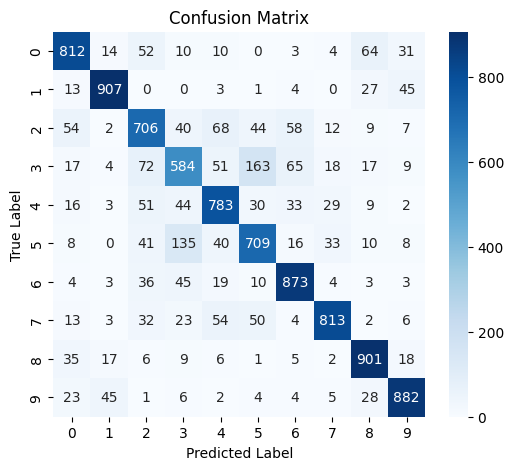

In [ ]:
# ==================================================================== #
# ======================== Build the Model =========================== #
# ==================================================================== #
def create_cnn_model_changing_actv():
  model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (3,3), activation='tanh', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 2
    layers.Conv2D(64, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Convolutional block 3
    layers.Conv2D(128, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='tanh', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  return model

# Build and plot the model
model_changing_actv = create_cnn_model_changing_actv()

# ================================================================= #
# ======================== Train the Model ======================== #
# ================================================================= #
# Compile the model
model_changing_actv.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Define callbacks
callback = [
    # if the validation metric does not improve for 10 consecutive epochs, training will stop
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #  if the validation metric does not improve for 5 consecutive epoches, the learning rate is reduced. (multiplied by factor)
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

history_changing_actv = model_changing_actv.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callback
)

# ============================================================== #
# ================ Plot and Evaluate the Model ================= #
# ============================================================== #
# Plot loss and accuracy
plot_train_history(history_changing_actv)

# Evaluate on train and test dataset
train_loss, train_accuracy = model_changing_actv.evaluate(x_train, y_train)
print(f"\nTrain Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
test_loss, test_accuracy = model_changing_actv.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
y_pred_changing_actv = np.argmax(model_changing_actv.predict(x_test), axis=1)
conf_matrix_changing_actv = confusion_matrix(y_test, y_pred_changing_actv)
plt.figure(figsize=(6, 5))
# Plot Confusion Matrix
sns.heatmap(conf_matrix_changing_actv, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Task 2e: Alternative Optimizers
- Change made compared to task 1:
  - Using SGD and RMSprep as optimizer
- Model Performance Comparasion:
  - Test accuracy is decreased greatly compared to the original one.
  | Accuracy | sgd (new) | rmsp (new) |adam (original)|
  | ---------| -------------------| ------------------|--------|
  | Train Accuracy | 0.8754 | 0.8754 | 0.9649 |
  | Test Accuracy | 0.6346 | 0.8542 | 0.8488 |
  - Generalization:
    - SGD: Large gap between train and test accuracy, poor generalization and strong underfitting.
    - RMSprop: Smaller gap compared to  SGD but larger compared to Adam, still presents overfitting.
  - Convergence:
    - SGD: Training and validation loss decrease slowly but remain relatively high, validation accuracy plateaus around 0.63, slow convergence.
    - RMSprop: Loss drop quickly and stabilizes, fast convergence.


Training with optimizer: <keras.src.optimizers.sgd.SGD object at 0x7ed0bc223a10>
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1783 - loss: 3.0675 - val_accuracy: 0.3157 - val_loss: 1.9272 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2933 - loss: 2.3546 - val_accuracy: 0.4339 - val_loss: 1.5964 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3534 - loss: 2.0477 - val_accuracy: 0.4636 - val_loss: 1.4776 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3851 - loss: 1.8907 - val_accuracy: 0.4455 - val_loss: 1.5807 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4106 - loss: 1.7653 - val_accuracy: 0.4745 - val_loss: 1.4649 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4297 - loss: 1.6809 - val_accuracy: 0.5209 - val_loss: 1.3506 - learning_rate: 0.001

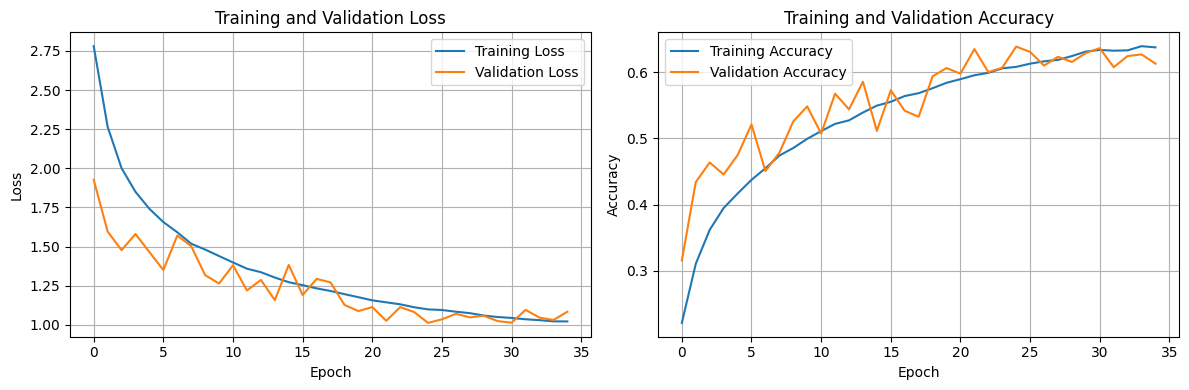

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6510 - loss: 0.9701
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6390 - loss: 1.0086
Train Accuracy with optimizer sgd: 0.8754
Train Loss with optimizer sgd: 0.3678
Test Accuracy with optimizer sgd: 0.6346
Test Loss with optimizer sgd: 1.0180

Training with optimizer: <keras.src.optimizers.rmsprop.RMSprop object at 0x7ecfbb6710a0>
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.3670 - loss: 2.0194 - val_accuracy: 0.5954 - val_loss: 1.1516 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6301 - loss: 1.0519 - val_accuracy: 0.5188 - val_loss: 1.5916 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7197 - loss: 0.8070 - val_accuracy: 0.7344 - val_loss: 0.7705 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7573 - loss: 0.7030 - val_accuracy: 0.7629 - val_loss: 0.6813 - learning

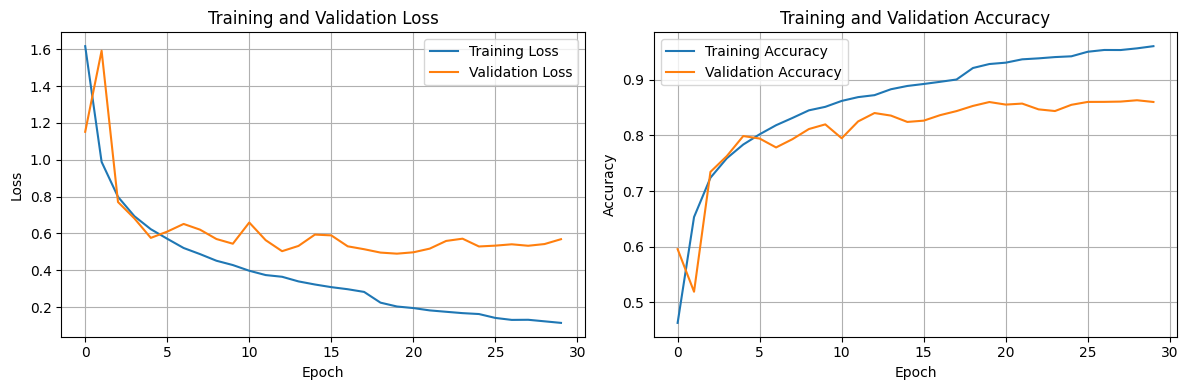

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9856 - loss: 0.0530
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8540 - loss: 0.5222
Train Accuracy with optimizer rmsp: 0.8754
Train Loss with optimizer rmsp: 0.3678
Test Accuracy with optimizer rmsp: 0.8542
Test Loss with optimizer rmsp: 0.5196


In [ ]:
optimizers = {
    'sgd': tf.keras.optimizers.SGD(learning_rate=0.001),
    'rmsp': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}
results = {}
for name, optimizer in optimizers.items():
  print(f'\nTraining with optimizer: {optimizer}')
  model_opt = create_cnn_model()
  model_opt.compile(
      optimizer=optimizer,
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_opt = model_opt.fit(
      x_train, y_train,
      batch_size=64,
      epochs=50,
      validation_split=0.2,
      callbacks=callback
   )
  results[name] = history_opt.history
  plot_train_history(history_opt)
  # Evaluate on test set
  test_loss, test_accuracy = model_opt.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_opt.evaluate(x_test, y_test)
  print(f'Train Accuracy with optimizer {name}: {train_accuracy:.4f}')
  print(f'Train Loss with optimizer {name}: {train_loss:.4f}')
  print(f'Test Accuracy with optimizer {name}: {test_accuracy:.4f}')
  print(f'Test Loss with optimizer {name}: {test_loss:.4f}')

## Task 2f: Batch Size
- Change made compared to task 1:
  - Batch size is changed from 64 to 32 and 256
- Model Performance Comparasion:
  - Test accuracy is decreased slightly compared to the original architecture.
  | Accuracy | batch_size=32 | batch_size=256 |batch_size=64 (original)|
  | ---------| -------------------| ------------------|------------------|
  | Train Accuracy | 0.8754 | 0.8754 | 0.9649 |
  | Test Accuracy | 0.8569 | 0.8333 | 0.8488 |
  - Generalization:
    - batch_size=32: Good, small gap between train and test accuracy.
    - batch_size=256: Worse, larger gap between train and test accuracy, and lower test accuracy.
  - Convergence:
    - batch_size=32: Smooth and stable, validation accuracy rises quickly and plateaus around epoch 10-15.
    - batch_size=256: Fast initial rise but less stable, validation accuracy plateaus earlier and lower.


Training with batch size:32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.3673 - loss: 1.9760 - val_accuracy: 0.3832 - val_loss: 1.9040 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6178 - loss: 1.0902 - val_accuracy: 0.6508 - val_loss: 1.0038 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6840 - loss: 0.9093 - val_accuracy: 0.7420 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7252 - loss: 0.7897 - val_accuracy: 0.7115 - val_loss: 0.8511 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7485 - loss: 0.7303 - val_accuracy: 0.7696 - val_loss: 0.6714 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7748 - loss: 0.6496 - val_accuracy: 0.7364 - val_loss: 0.7841 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 

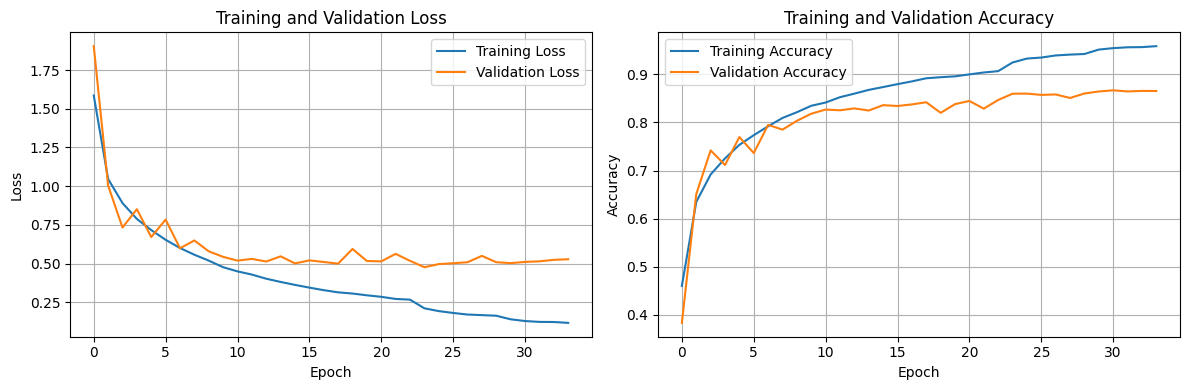

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9884 - loss: 0.0496
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8578 - loss: 0.4933
Train Accuracy with batch size=32: 0.8754
Train Loss with batch size=32: 0.3678
Test Accuracy with batch size=32: 0.8569
Test Loss with batch size=32: 0.4800

Training with batch size:256
Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.3188 - loss: 2.2449 - val_accuracy: 0.1305 - val_loss: 2.8274 - learning_rate: 0.0010
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5359 - loss: 1.3172 - val_accuracy: 0.1974 - val_loss: 2.8953 - learning_rate: 0.0010
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6360 - loss: 1.0311 - val_accuracy: 0.4041 - val_loss: 1.8302 - learning_rate: 0.0010
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6895 - loss: 0.8745 - val_accuracy: 0.6851 - val_loss: 0.9095 - learning_rate: 0.0010
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms

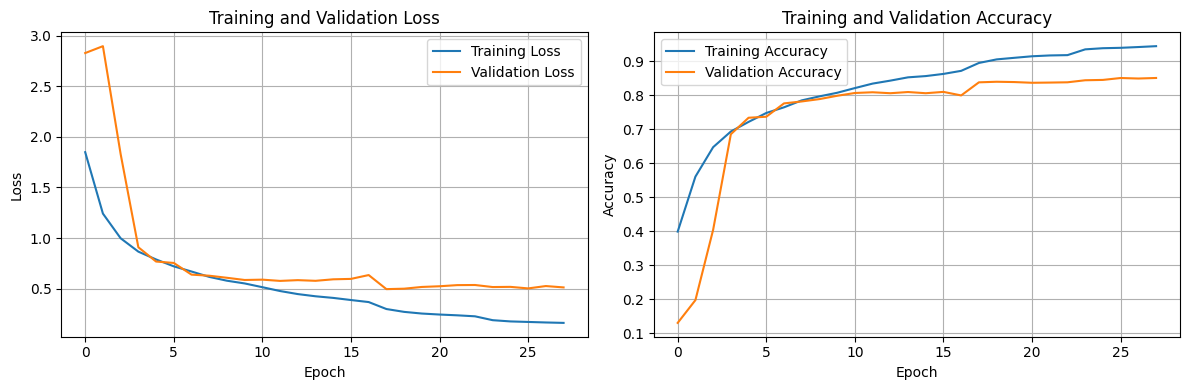

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9578 - loss: 0.1393
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8334 - loss: 0.5114
Train Accuracy with batch size=256: 0.8754
Train Loss with batch size=256: 0.3678
Test Accuracy with batch size=256: 0.8333
Test Loss with batch size=256: 0.5119


In [ ]:
batch_sizes = [32, 256]
results = {}
for batch_size in batch_sizes:
  print(f'\nTraining with batch size:{batch_size}')
  model_batch = create_cnn_model()
  model_batch.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  history_batch = model_batch.fit(
      x_train, y_train,
      batch_size=batch_size,
      epochs=50,
      validation_split=0.2,
      callbacks=callback
   )
  results[batch_size] = history_batch.history
  plot_train_history(history_batch)
  # Evaluate on test set
  test_loss, test_accuracy = model_batch.evaluate(x_train, y_train)
  test_loss, test_accuracy = model_batch.evaluate(x_test, y_test)
  print(f'Train Accuracy with batch size={batch_size}: {train_accuracy:.4f}')
  print(f'Train Loss with batch size={batch_size}: {train_loss:.4f}')
  print(f'Test Accuracy with batch size={batch_size}: {test_accuracy:.4f}')
  print(f'Test Loss with batch size={batch_size}: {test_loss:.4f}')

## **Task 2g: Visualisation of Convolutional Layers**
This task is using the original architecture built in Task 1, which has the following structure. *(**Note**: Since the number of filter is way too many in each layer, so in this task, only 8 channels will be displayed instead of the complete channels.)*
- 3 convolutional blocks, each contains:
  - 2 convolutional layers with a 3x3 kernel
  - Filter number ranges from 32 (first block), to 64 (second block) and 128 (third block).
  - 1 normalisation layer
  - 1 max pooling layer
- 1 Fully connected layer

Therefore, there are 6 convolutional layers in total organized in three blocks in this architecture, as visualised in the output.
- Layer 1 & 2 (first block): It has 32 filters with a 3x3 kernel, performs basic feature extraction. The outputs show clear edge so it detects basic edges, textures and patterns.
- Layer 3 & 4 (second block): It has 64 filters with a 3x3 kernel, performs intermediate feature extraction. It detects complex textures, object parts and structured patterns.
- Layer 5 & 6 (third block): It has 128 filters with a 3x3 kernel,  performs advanced feature extraction. It concentrates on complete object representations and classification.


In [ ]:
def visualize_conv_layers(model, sample_image, max_channels_to_show=8):
  # Show the original image
  plt.figure(figsize=(3, 3))
  plt.imshow(sample_image)
  plt.title(f"Original Test Image")
  plt.axis('off')
  plt.show()

  conv_layers = []
  for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
      conv_layers.append((i, layer))
  print(f'Found {len(conv_layers)} convolutional layers in the model.')

  # Visualize each layer
  for layer_num, (layer_index, layer_obj) in enumerate(conv_layers):
    print(f'\nVisualizing layer {layer_num + 1}: {layer.name}')
    # Create model that outputs specific layer
    dummy_input = np.expand_dims(sample_image, axis=0)
    _ = model.predict(dummy_input, verbose=0)

    # Create intermediate model
    intermediate_model = tf.keras.Model(
        inputs=model.inputs,
        outputs=layer_obj.output
    )

    # Get the feature maps
    feature_maps = intermediate_model.predict(dummy_input, verbose=0)
    feature_maps_single = feature_maps[0]  # Remove batch dimension

    print(f"Output shape: {feature_maps_single.shape}")

    # Show channels
    channels_to_show = min(max_channels_to_show, feature_maps_single.shape[2])

    # Create subplots
    if channels_to_show > 1:
      fig, axes = plt.subplots(1, channels_to_show, figsize=(15, 3))
    else:
      fig, ax = plt.subplots(1, 1, figsize=(5, 4))
      axes = [ax]

    # Display each channel
    for channel_idx in range(channels_to_show):
      channel_data = feature_maps_single[:, :, channel_idx]

      # Normalize to [0, 1]
      channel_min = channel_data.min()
      channel_max = channel_data.max()
      if channel_max > channel_min:
          channel_data = (channel_data - channel_min) / (channel_max - channel_min)
      else:
          channel_data = np.zeros_like(channel_data)

      axes[channel_idx].imshow(channel_data, cmap='gray')
      axes[channel_idx].set_title(f'Ch {channel_idx+1}')
      axes[channel_idx].axis('off')

    plt.suptitle(f'Layer {layer_num+1}: {layer_obj.name}')
    plt.tight_layout()
    plt.show()



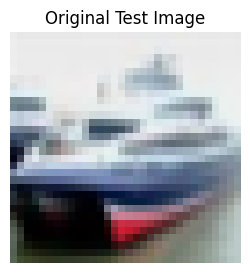

Found 6 convolutional layers in the model.

Visualizing layer 1: dense_1
Output shape: (32, 32, 32)


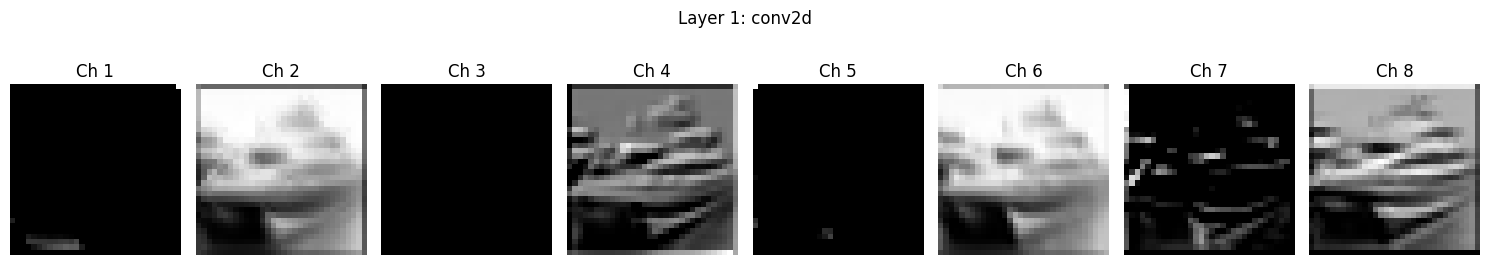


Visualizing layer 2: dense_1
Output shape: (32, 32, 32)


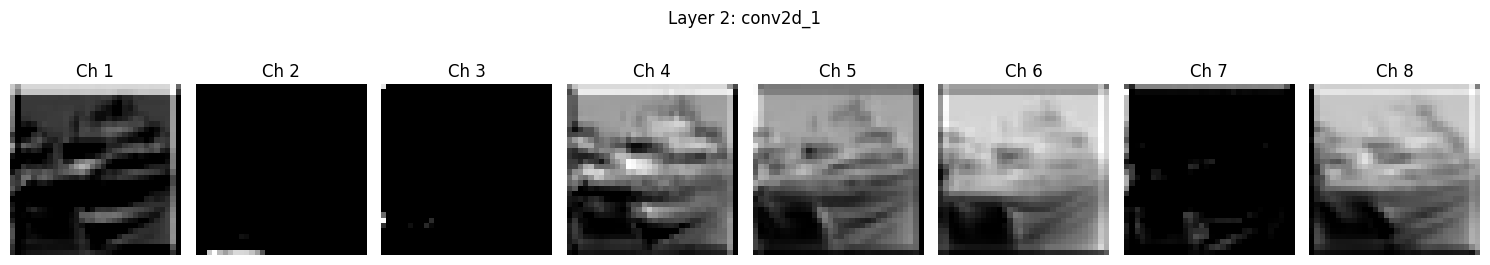


Visualizing layer 3: dense_1
Output shape: (16, 16, 64)


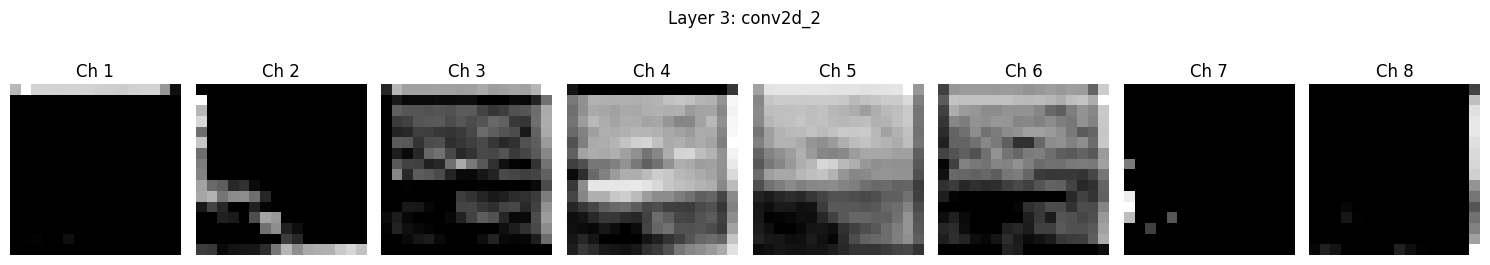


Visualizing layer 4: dense_1
Output shape: (16, 16, 64)


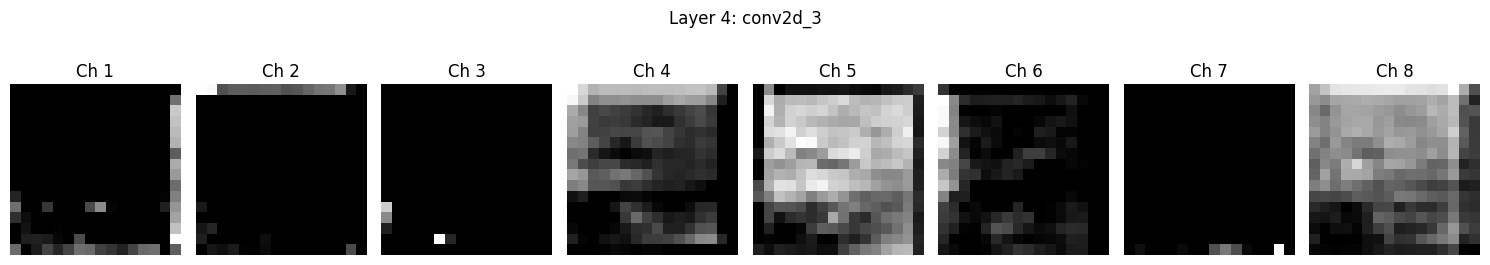


Visualizing layer 5: dense_1
Output shape: (8, 8, 128)


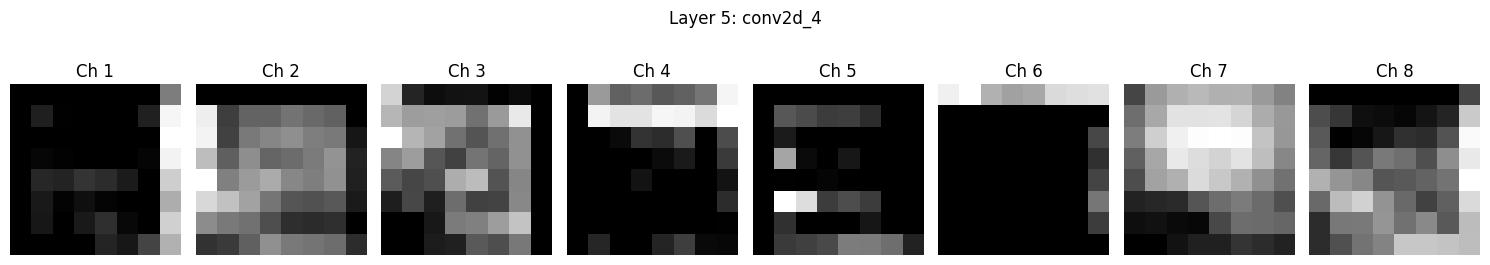


Visualizing layer 6: dense_1
Output shape: (8, 8, 128)


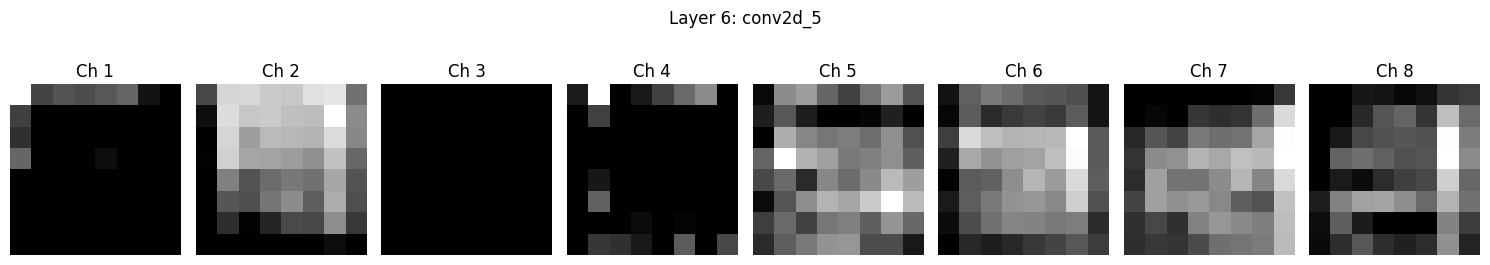

In [ ]:
# Prepare a sample image
sample_image = x_test[1]

visualize_conv_layers(model, sample_image)
